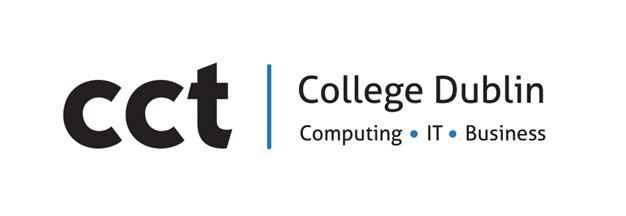

<h1 align="center">CA2 - Machine Learning</h1>
<h3 align="center">Lecturer: David McQuaid</h3>
<h3 align="center">Caio Machado de Oliveira</h3>
<h4 align="center">ID: 2020351</h4>
<h4 align="center">May/2024</h4>

In [1]:
#Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import EarlyStopping


# Neural Network - Part 1

In [2]:
# importing dataset
filename = 'BankRecords.csv'
data = pd.read_csv(filename)


In [3]:
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


## EDA - Exploratory Data Analysis

### Numerical Values

When first looking at the numerical features and its attributes, it is noticed that the feature "Experience(Years)" contain negative values that might cause problems in further applications.
It was identified that the features 'ID' and 'Sort Code' are not important for this application.

In [4]:
# Checking numerical values
data.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
data.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### Categorical Values

It is important to check que unique values to check for mispelling. '.unique()' allow us to visualize it. '.value_counts()' let us count each value on each feature. 

In [7]:
print(data['Education'].value_counts())
print(data['Education'].unique())

print("\n")
print(data['Personal Loan'].value_counts())
print(data['Personal Loan'].unique())

print("\n")
print(data['Securities Account'].value_counts())
print(data['Securities Account'].unique())

print("\n")
print(data['CD Account'].value_counts())
print(data['CD Account'].unique())

print("\n")
print(data['Online Banking'].value_counts())
print(data['Online Banking'].unique())


print("\n")
print(data['CreditCard'].value_counts())
print(data['CreditCard'].unique())


Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64
['Diploma' 'Degree' 'Masters']


Personal Loan
No     4520
Yes     480
Name: count, dtype: int64
['No' 'Yes']


Securities Account
No     4478
Yes     522
Name: count, dtype: int64
['Yes' 'No']


CD Account
No     4698
Yes     302
Name: count, dtype: int64
['No' 'Yes']


Online Banking
Yes    2984
No     2016
Name: count, dtype: int64
['No' 'Yes']


CreditCard
No     3530
Yes    1470
Name: count, dtype: int64
['No' 'Yes']


## Data Preparation

To prepare the data for a model application demand understanding of what will and won't be relevant, and may or may not affect the model accuracy.
After describing the numerical values on the EDA section, negative values were found on 'Experience(Years)' and will be removed as it might affect the model accuracy.
Was identified that 'ID' and 'Sort Code' are irrelevant for our model application. 

In [8]:
# Drop the 'ID' and 'Sort Code' columns and rename Income column for convenience
data = data.drop(['ID', 'Sort Code'], axis=1)
data = data.rename(columns={'Income(Thousands\'s)': 'Income'})

We have addressed that only the 'Experience(Years)' feature contain negative values, now we only need to count and remove the entire row from our dataset

In [11]:
# Count the number of negative observations 
negative_value = (data['Experience(Years)'] < 0).sum().sum()
print(f"Number of negative values on 'Age': {negative_value}")

Number of negative values on 'Age': 52


In [17]:
# Selecting rows with negative values in 'Experience(Years)' column
negative_rows = data[data['Experience(Years)'] < 0]
# Displaying the selected rows
print("Rows with negative values in 'Experience(Years)' column:")
negative_rows

Rows with negative values in 'Experience(Years)' column:


,Age,Experience(Years),Income,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
89,25,-1,113,4,2.300000,Masters,0,No,No,No,No,Yes
226,24,-1,39,2,1.700000,Degree,0,No,No,No,No,No
315,24,-2,51,3,0.300000,Masters,0,No,No,No,Yes,No
451,28,-2,48,2,1.750000,Masters,89,No,No,No,Yes,No
524,24,-1,75,4,0.200000,Diploma,0,No,No,No,Yes,No
536,25,-1,43,3,2.400000,Degree,176,No,No,No,Yes,No
540,25,-1,109,4,2.300000,Masters,314,No,No,No,Yes,No
576,25,-1,48,3,0.300000,Masters,0,No,No,No,No,Yes
583,24,-1,38,2,1.700000,Degree,0,No,No,No,Yes,No
597,24,-2,125,2,7.200000,Diploma,0,No,Yes,No,No,Yes


In [18]:
# Remove rows with negative values in 'Experience(Years)' column
data = data[data['Experience(Years)'] >= 0]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4948 non-null   int64  
 1   Experience(Years)      4948 non-null   int64  
 2   Income                 4948 non-null   int64  
 3   Family                 4948 non-null   int64  
 4   Credit Score           4948 non-null   float64
 5   Education              4948 non-null   object 
 6   Mortgage(Thousands's)  4948 non-null   int64  
 7   Personal Loan          4948 non-null   object 
 8   Securities Account     4948 non-null   object 
 9   CD Account             4948 non-null   object 
 10  Online Banking         4948 non-null   object 
 11  CreditCard             4948 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 502.5+ KB


### Processing features

### StandardScaler () & OneHotEncoder()

Processing the features play a fundamental role in our model. StandardScaler and OneHoteEncoder work together but have diffirent functions. 
StandardScaler is applied to numerical values that have different range ensuring the mean is equal to 0 and the standard deviation is equal to 1. Another option would be MinMaxScaler, which was tested previously and got worse accuracy.
OneHotEncode simply convert categorical variable into numerical, creating a binary column for each category indicating the presence or absence of that category.

In [20]:
# Separate the target variable from the processing 
income = data.pop('Income')

In [21]:
# List of categorical and numerical features
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_features = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']

In [22]:
# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Use drop='first' to avoid multicollinearity

In [23]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [24]:
# Apply the transformations
data_preprocessed = preprocessor.fit_transform(data)

In [25]:
# Convert the preprocessed data to a DataFrame for better readability
# Getting feature names for the new columns created by OneHotEncoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numerical_features + list(encoded_columns)

In [26]:
# Create a DataFrame
data_model = pd.DataFrame(data_preprocessed, columns=all_columns)

In [27]:
data_model

,Age,Experience(Years),Family,Credit Score,Mortgage(Thousands's),Education_Diploma,Education_Masters,Personal Loan_Yes,Securities Account_Yes,CD Account_Yes,Online Banking_Yes,CreditCard_Yes
0,-1.816072,-1.709074,1.400757,-0.192215,-0.556228,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.049224,-0.117679,0.529926,-0.249439,-0.556228,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.579278,-0.471322,-1.211736,-0.535558,-0.556228,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.932648,-1.001787,-1.211736,0.437247,-0.556228,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.932648,-1.090198,1.400757,-0.535558,-0.556228,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4943,-1.462703,-1.532252,-1.211736,-0.020543,-0.556228,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4944,-1.374360,-1.443841,1.400757,-0.878901,0.278590,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4945,1.540939,1.650538,-0.340905,-0.936125,-0.556228,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4946,1.717624,1.738949,0.529926,-0.821677,-0.556228,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Add target variable back to data
data_model['Income'] = income.values

In [29]:

data_model.head()

,Age,Experience(Years),Family,Credit Score,Mortgage(Thousands's),Education_Diploma,Education_Masters,Personal Loan_Yes,Securities Account_Yes,CD Account_Yes,Online Banking_Yes,CreditCard_Yes,Income
0,-1.816072,-1.709074,1.400757,-0.192215,-0.556228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,49
1,-0.049224,-0.117679,0.529926,-0.249439,-0.556228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34
2,-0.579278,-0.471322,-1.211736,-0.535558,-0.556228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11
3,-0.932648,-1.001787,-1.211736,0.437247,-0.556228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
4,-0.932648,-1.090198,1.400757,-0.535558,-0.556228,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45


In [30]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4948 non-null   float64
 1   Experience(Years)       4948 non-null   float64
 2   Family                  4948 non-null   float64
 3   Credit Score            4948 non-null   float64
 4   Mortgage(Thousands's)   4948 non-null   float64
 5   Education_Diploma       4948 non-null   float64
 6   Education_Masters       4948 non-null   float64
 7   Personal Loan_Yes       4948 non-null   float64
 8   Securities Account_Yes  4948 non-null   float64
 9   CD Account_Yes          4948 non-null   float64
 10  Online Banking_Yes      4948 non-null   float64
 11  CreditCard_Yes          4948 non-null   float64
 12  Income                  4948 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 502.7 KB


In [ ]:
print("NaN values in the DataFrame:")
print(data_model.isna().sum())

In [ ]:
# Separate features and target variable
X = data_model.drop('Income', axis=1)
y = data_model['Income']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the Keras Sequential model with tuned hyperparameters
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

# Linear Regression Model


In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

# Multilayer Perceptron Regressor

In [ ]:
# Define the Keras Sequential model with tuned hyperparameters
model_mlp = Sequential()
model_mlp.add(Dense(150, input_dim=X_train.shape[1], activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

# Train an MLP Regressor
model_mlp = MLPRegressor(
    solver='adam',
    learning_rate='adaptive',
    hidden_layer_sizes=(100, 50),
    alpha=0.0001,
    activation='relu',
    max_iter=1000,
    random_state=42
)


In [ ]:
history_mlp = model_mlp.fit(X_train, y_train)


In [ ]:
# Evaluate the model
y_pred_mlp = model_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

# Random Forest Regression

In [ ]:
# Tune the parameters for make_regression
X, y = make_regression(
    n_samples=1000,        # Number of samples
    n_features=12,         # Number of features
    n_informative=6,       # Number of informative features
    noise=0.2,             # Standard deviation of Gaussian noise
    bias=0.5,              # Bias term in the underlying linear model
    random_state=42        # Seed for reproducibility
)

In [ ]:
# Create a Random Forest Regressor
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model_RF.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred_RF = model_RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_RF)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

In [ ]:
# New customer details
new_customer = {
    'Age': 30,
    'Experience(Years)': 5,
    'Sort Code': 92011,
    'Family': 2,
    'Credit Score': 1.2,
    'Mortgage(Thousands\'s)': 20,
    'Education': 'Degree',
    'Personal Loan': 'No',
    'Securities Account': 'Yes',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Apply the same preprocessing to the new customer data
new_customer_preprocessed = preprocessor.transform(new_customer_df)

# Predict income using the keras model
new_customer_income_keras = model.predict(new_customer_preprocessed)

# Predict income using the linear model
new_customer_income_linear = linear_model.predict(new_customer_preprocessed)

# Predict income using the MLP model
new_customer_income_mlp = model_mlp.predict(new_customer_preprocessed)

# Predict income using the Random Forest model
new_customer_income_RF = model_RF.predict(new_customer_preprocessed)

# Print the results
print("Predicted income using keras model:", new_customer_income_keras[0])
print("Predicted income using linear model:", new_customer_income_linear[0])
print("Predicted income using MLP model:", new_customer_income_mlp[0])
print("Predicted income using Random Forest model:", new_customer_income_RF[0])

